In [426]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_line
from skimage import io
from skimage.filters import sobel
from skimage.transform import hough_line
from numpy import cos,sin,deg2rad
import math
import skimage.draw
import skimage.color
import os
import pandas as pd
from skimage.transform import rescale
from skimage.transform import hough_line_peaks

In [427]:
# Funções para operações geométricas passadas na aula

def translacao (tx, ty):

    return np.array ([[1,0,tx], \
                      [0,1,ty], \
                      [0,0,1]]).astype('float')

def escalonamento (sx, sy):
    return np.array ([[sx,0,0], \
                      [0,sy,0], \
                      [0,0,1]]).astype('float')

def rotacao (theta):
    theta = deg2rad (theta)
    c = cos (theta)
    s = sin (theta)
    return np.array ([[c,-s,0], \
                      [s,c,0], \
                      [0,0,1]]).astype('float')

<p style="text-align:center;">Início do código principal</p>

In [428]:
# Leitura dos códigos de barras, converção de escala para tons de cinza e converção inteiro
img = (io.imread ('codigo_rotacionado_102.jpg').astype('uint8')) # Para as imagens rotacionadas

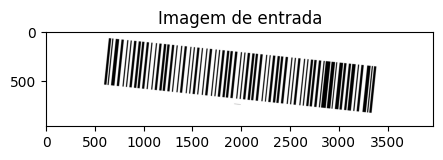

Imagem.shape[0] = 965, Imagem.shape[1] = 3970


In [429]:
# Exibe uma única imagem
plt.figure(figsize=(5, 5))  # Ajustar o tamanho da figura
plt.imshow(img, cmap='gray',vmin=0,vmax=255)  # Mostrar a imagem em escala de cinza
plt.title('Imagem de entrada')  # Definir o título
plt.show()
print(f"Imagem.shape[0] = {img.shape[0]}, Imagem.shape[1] = {img.shape[1]}") # Apresentando o tamanho da imagem

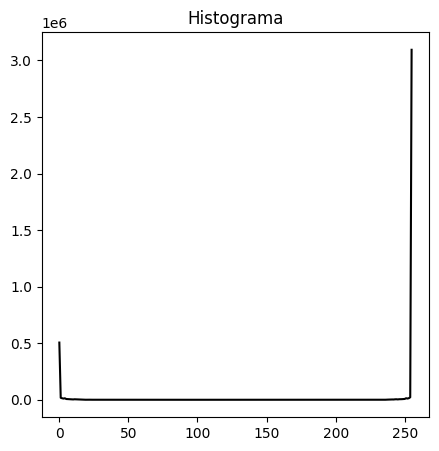

In [430]:
# Exibe o histograma da imagem
plt.figure(figsize=(5, 5))  # Ajustar o tamanho da figura
h = np.histogram (img,bins=256) # Calcula o histograma
plt.plot (h[0],'-k')
plt.title('Histograma')  # Definir o título
plt.show()

In [431]:
# Binarização da imagem, continua em tons de cinza, porém com limites bem estabelecidos
img_bin = img.copy()
img_bin[img_bin<100] = 0 # Define limitre inferior
img_bin[img_bin>0] = 255 # Define limite superior
img_bin = 255-img_bin 

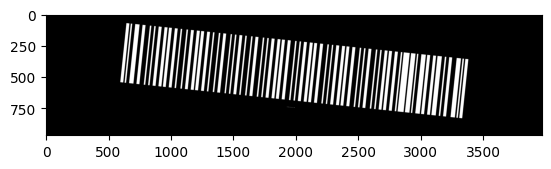

In [432]:
plt.imshow (img_bin,cmap='gray')

In [433]:
# Aplica o filtro derivativo de sobel com a função da biblioteca skimage
edges = (sobel (img_bin)*255).astype('uint8')

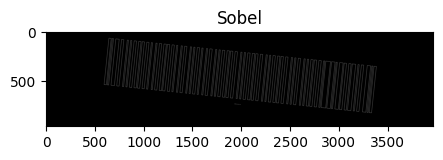

In [434]:
# Exibe uma única imagem
plt.figure(figsize=(5, 5))  # Ajustar o tamanho da figura
plt.imshow(edges, cmap='gray',vmin=0,vmax=255)  # Mostrar a imagem resultante do Sobel em escala de cinza
plt.title('Sobel')  # Definir o título
plt.show()

In [435]:
h = np.histogram (edges,bins=256) # Calcula o histograma da imagem de Sobel

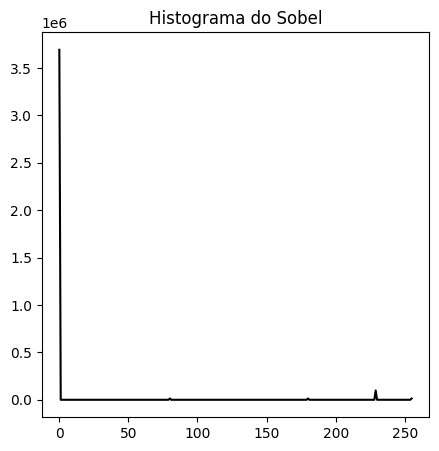

In [436]:
# Exibe uma única imagem
plt.figure(figsize=(5, 5))  # Ajustar o tamanho da figura
plt.plot(h[0],'-k')
plt.title('Histograma do Sobel')  # Definir o título
plt.show()

In [437]:
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360) # Cria o espaço de parâmetros
h, theta, d = hough_line(edges, theta=tested_angles) # Alimenta as variáveis h, theta e d com as retas, os ângulos e as distências,
                                                     # respectivamente

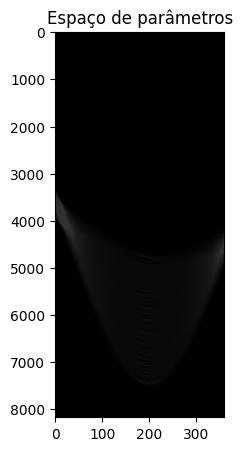

In [438]:
h.max() # Pega o valor máximo de reta, ou seja, a reta mais votada
# Exibe uma única imagem
plt.figure(figsize=(5, 5))  # Ajustar o tamanho da figura
plt.imshow (h,cmap='gray',aspect=1/10) # Ajusta a escala do plot
plt.title('Espaço de parâmetros')  # Definir o título
plt.show()

In [439]:
h_aux = h.copy() # Faz uma cópia de h
h_aux[h_aux<200] = 0 # Pega somente os h's com mais votos, dentro desse limite (que ainda permite muitas retas)

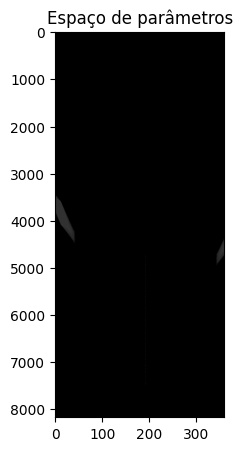

In [440]:
# Exibe uma única imagem
plt.figure(figsize=(5, 5))  # Ajusta o tamanho da figura
plt.imshow (h_aux,cmap='gray',aspect=1/10) # Exibe o espaço de parâmetros com as retas mais votadas
plt.title('Espaço de parâmetros')  # Define o título
plt.show()

In [441]:
# Detectando picos nas linhas
# O threshold (limiar para filtrar os picos com valores baixos) pode ser ajustado para garantir que apenas
# linhas significativas sejam detectadas, o que garante melhores valores para os ângulos, porém isso ainda
# é ponto de dificuldade da equipe
threshold = 180

In [442]:
# Matriz de Hough (h_max) e ângulos (theta) e distâncias (d)
# Inicializando listas para armazenar os picos detectados
picos_de_angulos = []
picos_de_distancias = []

Nesse ponto, são reconhecidas as retas e ângulos mais importantes da transformada ht.

In [443]:
peaks = hough_line_peaks(h, theta, d, threshold=0.7*h.max(),  # Threshold relativo para evitar falsos positivos
                         num_peaks=20, min_distance=10)


angulos_graus = np.rad2deg(peaks[1]) # Pega o primeiro retorno da tupla da função
angulos_filtrados = []

for angulo in angulos_graus:
    # Normaliza para -90° a 90°
    angulo_norm = angulo % 180
    if angulo_norm > 90:
        angulo_norm -= 180
        
    # Considera apenas ângulos próximos de 0°, 90°, -90° com margem de 15°
    if abs(angulo_norm) < 15 or abs(angulo_norm - 90) < 15 or abs(angulo_norm + 90) < 15:
        angulos_filtrados.append(angulo_norm)

# Determinação do ângulo mais significativo, nessa base, ele não inicia em 90°, mas em 70°
if angulos_filtrados:
    hist, bins = np.histogram(angulos_filtrados, bins=30, range=(-90, 90))
    angulo_mais_votado = bins[np.argmax(hist)]
else:
    angulo_mais_votado = 0  # Assume que está reto se não encontrar nada

In [444]:
angulos = list() # Cria uma lista
cdst = skimage.color.gray2rgb(edges) # Converte, usando os skimage, a imagem de cinza para rgb

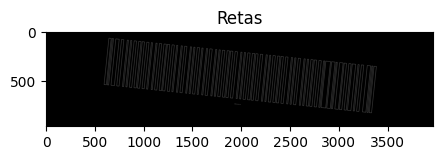

In [445]:
# Exibe uma única imagem
plt.figure(figsize=(5, 5))  # Ajusta o tamanho da figura
plt.imshow (cdst) # Mostra a imagem com as retas
plt.title('Retas')  # Defini o título
plt.show()

In [446]:
print("Ângulo mais votado:", angulo_mais_votado)

Ângulo mais votado: -84.0


Usando as funções da transformações geométricas passadas em sala para realizar a operação de rotação.
Com os testes realizados, o código não performou bem com imagens quadradas, e com ângulos pouco assentuados.
A equipe obteve êxito no ajuste de ângulos elevados, e lendo imagens já alinhadas.

In [ ]:
result = img # Garante que se a imagem não tiver ângulos suficientes, portanto já está alinhada ou muito próximo a isso,
             # a imagem não será alterada
IM = 0             
if abs(angulo_mais_votado + 70) >= 5: # Para imagens muito longas, o 90° é deslocado para 70° ou 73°, essa é
                                                                     # uma característica específica dessa base de dados.
                                                                     # por esse motivo a rotação é deslocada em theta + 73°,
                                                                     # isso serve para ambos os casos. 
    IM = translacao(img.shape[0]//2,\
                    img.shape[1]//2).dot(rotacao(angulo_mais_votado + 73)).dot(translacao(-img.shape[0]//2,\
                                                                                    -img.shape[1]//2))
    # Faz a rotação no ângulo mais votado com base na função passa em aula
    result = np.zeros_like (img)
    for x in range (img.shape[0]):
        for y in range (img.shape[1]):
            p1 = np.array([x,y,1]).reshape(3,1)
            p2 = IM.dot (p1)
            if p2[0] >= 0 and p2[0]<img.shape[0]-.5 and p2[1] >= 0 and p2[1] <img.shape[1]-.5:
                result[x,y] = img [int (p2[0]+0.5), int(p2[1]+0.5)]                     

C:\Users\g4lim\AppData\Local\Temp\ipykernel_13852\3122158144.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[x,y] = img [int (p2[0]+0.5), int(p2[1]+0.5)]


In [474]:
print (IM) # Mostra a matriz de rotação

[[ 9.81627183e-01  1.90808995e-01 -3.70881785e+02]
 [-1.90808995e-01  9.81627183e-01  1.28630786e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


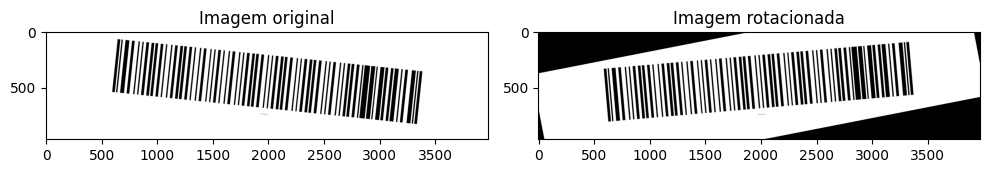

In [475]:
# Visualiza o antes e o depois
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # Ajusta o tamanho da figura
ax[0].set_title('Imagem original')  # Define o título
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Imagem rotacionada')  # Define o título
ax[1].imshow(result, cmap='gray')
plt.tight_layout()  # Exibe as duas imagens
plt.show()

In [476]:
print(f"Imagem.shape[0] = {result.shape[0]}, Imagem.shape[1] = {result.shape[1]}") # Apresentando o tamanho da imagem

Imagem.shape[0] = 965, Imagem.shape[1] = 3970


In [477]:
# Binariza novamente a imagem
result[result <= 0.5] = 0
result[result > 0.5] = 1

In [478]:
# Pegando a linha central para detectar as bordas horizontais
linha_central = result[result.shape[0] // 2, :]  # Pegamos a linha do meio

# Encontrar a primeira e última coluna com pixel preto
col_ini = np.argmax(linha_central == 0) # Primeira ocorrência de preto
col_fim = (len(linha_central) - np.argmax(linha_central[::-1] == 0)) # Última ocorrência de preto

# Cortar a imagem apenas na região útil
result = result[:, col_ini:col_fim]  # Mantemos todas as linhas, mas cortamos colunas

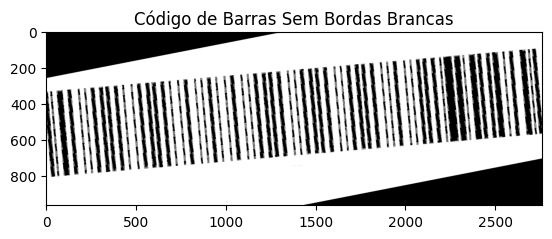

In [479]:
# Mostrar a imagem cortada
plt.imshow(result, cmap='gray')
plt.title('Código de Barras Sem Bordas Brancas')
plt.show()

In [480]:
print(f"Imagem.shape[0] = {result.shape[0]}, Imagem.shape[1] = {result.shape[1]}") # Apresentando o tamanho da imagem

Imagem.shape[0] = 965, Imagem.shape[1] = 2762


Tomando a atividade 2 como exemplo, na qual é usada a biblioteca do skimage para mudar a escala das placas de carros:

<p style="text-align:center;">img_bin_comprimida= rescale(img, scale_x, anti_aliasing=True)</p>

foi pensada uma estratéria para pegar o códido de barras, de forma simplificada, já que a imagem não tem dimensõs de 1:1 com relação as barras, o que causa problemas na leitura caso não seja corrigido. Podem haver outros métodos, porém a equipe julgou esse como o mais rápido e efeitvo de ser implementado com base nos materiais disponibilizados anteriormente.

In [481]:
# Obtem a largura da imagem
largura_original = result.shape[1]

# Estima o número de barras analisando as transições preto-branco
linha_meio = result[result.shape[0] // 2, :]  # Pega a linha central

# Verifica as transições

# 1) linha_meio < 1 => Isso cria um array booleano onde True representa pixels pretos (valores menores que 1) e False representa
#    pixels brancos (valores maiores que 1).
# 2) np.diff(linha_meio < 1) => A função np.diff() calcula a diferença entre elementos consecutivos no array booleano.
# 3) np.count_nonzero(np.diff(linha_meio < 1)) => conta quantos valores diferentes de zero existem. Como cada transição
#    (preto → branco ou branco → preto) gera um 1 ou -1, essa contagem nos dá o número total de transições no código de barras.
transicoes = np.count_nonzero(np.diff(linha_meio < 1))  # Contar mudanças P/B

# Define o fator de escala horizontal para que cada barra tenha 1 pixel de largura
scale_x = transicoes / largura_original  # Fator de escala na largura

# Aplica o rescale mantendo a altura (scale_y = 1)
result_comprimida = rescale(result, (1, scale_x), anti_aliasing=False, order=0)

# Converte para uint8 para exibição correta
result_comprimida = (result_comprimida * 255).astype(np.uint8)


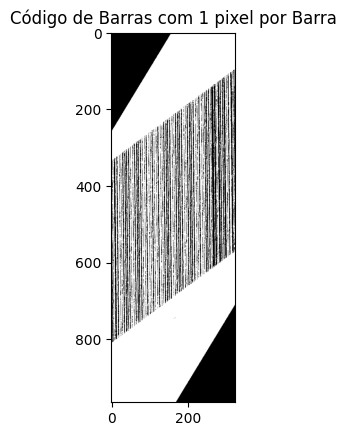

In [482]:
# Mostrar a imagem comprimida
plt.imshow(result_comprimida, cmap='gray')
plt.title('Código de Barras com 1 pixel por Barra')
plt.show()

In [483]:
print(f"Imagem.shape[0] = {result_comprimida.shape[0]}, Imagem.shape[1] = {result_comprimida.shape[1]}") # Apresentando o tamanho da imagem

Imagem.shape[0] = 965, Imagem.shape[1] = 324


In [484]:
# Binariza novamente a imagem
result_comprimida[result_comprimida <= 175] = 0
result_comprimida[result_comprimida > 175] = 1

In [485]:
# Encontrar o índice da linha central
linha_central = result_comprimida.shape[0] // 2  # Divide por 2 para pegar o meio

In [486]:
# Pegar apenas a linha central e todas as suas colunas
codigo = result_comprimida[linha_central, :]

In [487]:
print(f"Código encontrado: {codigo}")
print(f"Tamanho do código encontrado: {len(codigo)}")

Código encontrado: [0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1
 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0
 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0
 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1
 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0
 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0]
Tamanho do código encontrado: 324


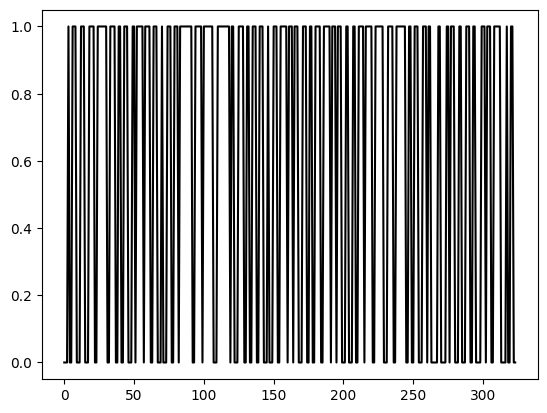

In [488]:
# Exibe a linha como uma imagem
plt.plot(codigo, '-k')  # Plota a intensidade da linha
plt.show()

In [489]:
codigo = 1 - codigo # Calcula o negativo, pois código de barras é em nagetivo, todos os valores comaçam com uma barra de zeros
                    # que são lidos como uns

Se código foi digitado manualmente, como um conjunto de zeros e uns, em uma array numpy, no formato code 128, não importando o tamanho, desde que tenha 11 elementos por palavras, ele será reconhecido. Essa é a primeira parte do entregável.

In [490]:
print(f"Código encontrado: {codigo}")
print(f"Tamanho do código encontrado: {len(codigo)}")

Código encontrado: [1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1
 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0
 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1
 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1]
Tamanho do código encontrado: 324


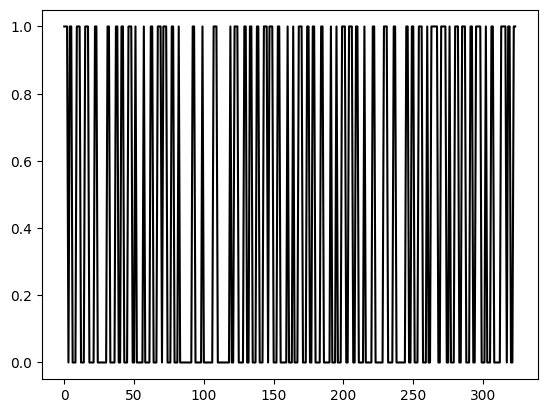

In [491]:
# Exibe a linha como uma imagem
plt.plot(codigo, '-k')  # Plota a intensidade da linha
plt.show()

In [492]:
# Concatena o array, tornando-o uma string, o que retira as vírgulas
str_codigo = "".join((codigo.astype(int)).astype(str))

In [493]:
print(str_codigo) # Printa o código

111011000111000111000011000000011000011001100011100100000100001100011101110001100010000000001100000100000001110000000001001110000110011000110001110111000110000010001000111000110011000011000001000100011100111001100001000001100000011100001100000001100110001110001001111100111100100011100111000110011110001000110000011110110011


A tabela de referências foi gerada usando o códigos de barras code 128, e consta em anexo junto a atividade, nomeado "AtvFINAL-Gabriel_Lima_Dantas-Rafael_Lima_Dantas-t03 - Tabela code128 completa.xlsx"

A tabela é só de um caractere, assim temos cerca de 119 opções

In [494]:
tabela = pd.read_excel('AtvFINAL-Gabriel_Lima_Dantas-Rafael_Lima_Dantas-t03 - Tabela code128 completa.xlsx', engine='openpyxl')

In [495]:
# Separar as colunas em variáveis separadas
referencia = tabela['Padrão Code 128'].to_numpy()  # Substitua 'nome_da_coluna_numerica' pelo nome correto da coluna
mensagem = tabela['Caractere'].to_numpy()    # Substitua 'nome_da_coluna_strings' pelo nome correto da coluna

In [496]:
palavras = [] # Cria uma lista para as palavras, os conjuntos de 11 dígitos que formam o código de barras
grupo = 0 # Contado para separar as palavras
for e in range(len(str_codigo)//11): # O //11, evita que a lista tenha elementos vazios
    palavras.append(str_codigo[grupo:grupo+11]) # Juntas os conjuntos na lista
    grupo = grupo + 11 # Pula a cada 11 dígitos

In [497]:
print(palavras) # Printa a lista com as palavras

['11101100011', '10001110000', '11000000011', '00001100110', '00111001000', '00100001100', '01110111000', '11000100000', '00001100000', '10000000111', '00000000010', '01110000110', '01100011000', '11101110001', '10000010001', '00011100011', '00110000110', '00001000100', '01110011100', '11000010000', '01100000011', '10000110000', '00011001100', '01110001001', '11110011110', '01000111001', '11000110011', '11000100011', '00000111101']


Ao encontrar o código correspondente, é impresso o caractere associado. O enumerate() acessa tanto o valor de referencia quanto o índice, e permite imprimir o caractere correspondente a mensagem[i].

In [498]:
for p in palavras:  # Compara a lista com a tabela
    for i, confere in enumerate(referencia): 
        if confere == int(p): # Passa novamente para int, a fim de comparar com a tabela
            print(f"Encontrado: {mensagem[i]}") # Apresenta o resultado das comparações realizadas            